In [166]:
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw, ImageFont
import os
import shutil
from astropy.io import fits
import re
import numpy as np
#Plot stuff
import pandas as pd
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import ColumnDataSource

def read_excel(file_path, sheet_name: str, usecols: list, name: list):
    # 读取Excel文件中特定的工作表
    df = pd.read_excel(file_path, sheet_name=sheet_name, usecols=usecols, skiprows=1, skipfooter=0)
    
    # 删除空白行
    df.dropna(how='all', inplace=True)

    # 将第一行非空白数据作为标题
    df.columns = df.iloc[0]
    df = df[1:]
    df.reset_index(drop=True, inplace=True)
    
    # Debugging: Print the DataFrame columns
    print("DataFrame columns:", df.columns)

    # Ensure column names are correct
    df.columns = [col.strip() for col in df.columns]

    # Check if all names exist in the DataFrame columns
    for col in name:
        if col not in df.columns:
            raise ValueError(f"Column '{col}' not found in the DataFrame.")

    # Return the requested columns
    return [df[col] for col in name]
 

def sval(ss): #'spt'
    def vs(s): #v from s, for single value
        if s=='nan':
            v= np.float('nan')
            return np.float('nan')
        else:
            val=60-['O','B','A','F','G','K','M','L','T','Y'].index(s[0])*10+(10-float(s[1:].strip('V').strip('I')))
        if s[0] in ['M','L','T','Y']: #M gets set back because of K; K7 should be right next to M0
            val+=2
        if 'III' in s:
            v= val-100.
        elif 'I' in s and 'III' not in s and 'V' not in s:
            v= val-200.
        else:
            v= val
        return v
    if type(ss)==str:
        final=vs(ss)
    if type(ss)==list or type(ss)==type(np.array([1])):
        final=[]
        for i in range(len(ss)):
            s=ss[i]
            v=vs(s)
            final.append(v)
    return final

def sptfromsval(s): #'spt'
    obafgkm=['O','B','A','F','G','K','M']
    if s<=12:
        s-=2 #handle the Ms
    if s>=0:
        lum='V'
        S=int(s/10.)
    elif s<0 and s>=-100:
        lum='III'
        S=int((s+100.)/10.)
    elif s<-100:
        lum='I'
        S=int((s+200.)/10.)
    else:
        print('Error with luminosity class.')
    clas=str(round(10-(s-float(10*S)),1)).replace('.0','')
    if round(10-(s-float(10*S)),1)==10:
        clas='0'
        S-=1
    oba=obafgkm[6-S]
    return oba+clas+lum


In [167]:
file_path=r'C:\Users\ZY\Desktop\RV_comparasion.xlsx'

#read the excel to get the name and spectral type
sheet_name='Original'

x,y=read_excel(file_path,sheet_name,"X,O",['CG','rv'])

    # Plot
plt.figure(figsize=(30, 10))  # Larger figure size
plt.scatter(x,y, color='deepskyblue',alpha=0.3,label='Chiron')
plt.xticks(rotation=90, fontsize=20)  # Rotate the x-axis labels for better readability and increase font size
plt.yticks(fontsize=12)  # Increase y-axis font size
plt.xlabel('#cluster', fontsize=14)  # Increase x-axis label font size
plt.ylabel('rv', fontsize=14)  # Increase y-axis label font size
plt.title('Scatter plot of #cluster vs rv', fontsize=16)  # Increase title font size
plt.grid(True)
plt.gca().margins(x=0.1)  # Add margins between x-axis ticks

# # Annotate the points with names
# for i, name in enumerate(df['#name']):
#     plt.annotate(name, (df['#name'][i], df['rv'][i]), fontsize=10, rotation=45, ha='right')


#goodman
good_x,good_y=read_excel(file_path,sheet_name,"A,C",['CG','rv'])
plt.scatter(good_x,good_y,alpha=0.3,color='orange',label='Goodman')
xerr = read_excel(file_path, sheet_name, "D", ['rverr'])
plt.errorbar(good_x, good_y,xerr=None,yerr=xerr,fmt='.', color='red', label='Chiron for Goodman')

#chiron for goodman
chiron_good_x,chiron_good_y=read_excel(file_path,sheet_name,"Y,AA",['CG','rv'])
plt.scatter(chiron_good_x,chiron_good_y,alpha=0.1,color='black',label='Chiron for Goodman')

xerr = read_excel(file_path, sheet_name, "AB",['rverr'])
plt.errorbar(chiron_good_x, chiron_good_y,xerr=None,yerr=xerr,fmt='.', color='black', label='Chiron for Goodman')
plt.legend()
plt.tight_layout()
plt.show()




DataFrame columns: Index(['#name', 'beststd'], dtype='object', name=0)


ValueError: Column 'CG' not found in the DataFrame.

In [168]:
from collections import Counter
file_path=r'C:\Users\ZY\Desktop\RV_comparasion.xlsx'

#read the excel to get the name and spectral type
sheet_name='Original'
x=np.array(read_excel(file_path, sheet_name, "G", ['CG']))[0]
#y=error(file_path, sheet_name, "D", 'rverr')
dict1=dict(Counter(x))



IndexError: single positional indexer is out-of-bounds

In [157]:
from collections import Counter
file_path=r'C:\Users\ZY\Desktop\RV_comparasion.xlsx'

#read the excel to get the name and spectral type
sheet_name='Sheet1'
y=np.array(read_excel(file_path, sheet_name, "D", ['cluster']))[0]
#y=error(file_path, sheet_name, "D", 'rverr')
dict2=dict(Counter(y))

DataFrame columns: Index(['cluster'], dtype='object', name=0)


In [158]:
from collections import Counter
file_path=r'C:\Users\ZY\Desktop\RV_comparasion.xlsx'

#read the excel to get the name and spectral type
sheet_name='Original'
x=np.array(read_excel(file_path, sheet_name, "AN", ['CG']))[0]
#y=error(file_path, sheet_name, "D", 'rverr')
dict3=dict(Counter(x))


DataFrame columns: Index(['CG'], dtype='object', name=0)


In [159]:
from collections import Counter
file_path=r'C:\Users\ZY\Desktop\RV_comparasion.xlsx'

#read the excel to get the name and spectral type
sheet_name='Sheet1'
y=np.array(read_excel(file_path, sheet_name, "T", ['CG']))[0]
#y=error(file_path, sheet_name, "D", 'rverr')
dict4=dict(Counter(y))

DataFrame columns: Index(['CG'], dtype='object', name=0)


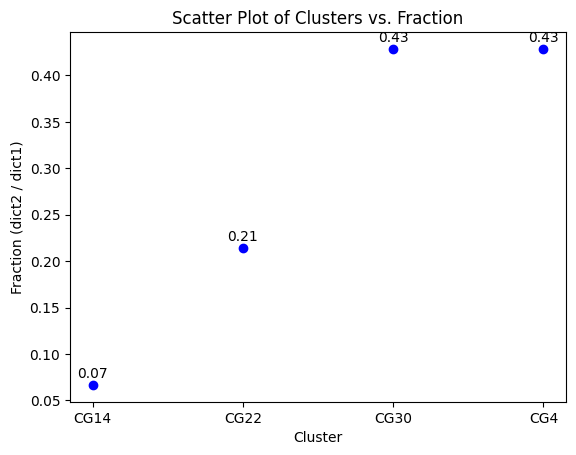

In [160]:
# Calculate fractions
#Only for goodman
fractions = {key: dict2[key] / dict1[key] for key in dict2.keys()}

# Prepare data for plotting
clusters = list(fractions.keys())
fraction_values = list(fractions.values())

# Create the scatter plot
plt.scatter(clusters, fraction_values, color='blue')

# Annotate each point with the fraction value
for cluster, fraction in fractions.items():
    plt.annotate(f'{fraction:.2f}', (cluster, fraction), textcoords="offset points", xytext=(0,5), ha='center')

# Add labels and title
plt.xlabel('Cluster')
plt.ylabel('Fraction (dict2 / dict1)')
plt.title('Scatter Plot of Clusters vs. Fraction')

# Display the plot
plt.show()

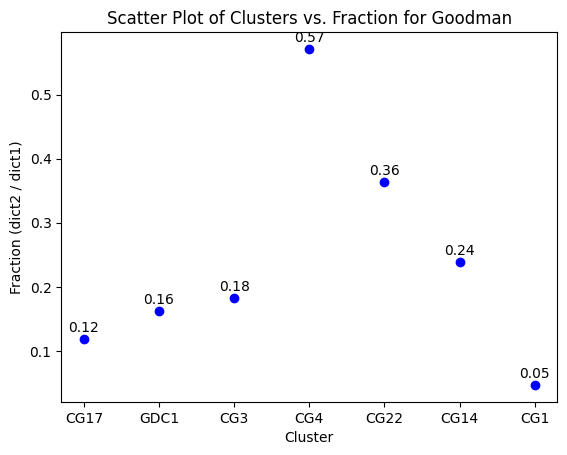

In [161]:
# Calculate fractions
fractions = {key: dict4[key] / dict3[key] for key in dict4.keys()}

# Prepare data for plotting
clusters = list(fractions.keys())
fraction_values = list(fractions.values())

# Create the scatter plot
plt.scatter(clusters, fraction_values, color='blue')

# Annotate each point with the fraction value
for cluster, fraction in fractions.items():
    plt.annotate(f'{fraction:.2f}', (cluster, fraction), textcoords="offset points", xytext=(0,5), ha='center')

# Add labels and title
plt.xlabel('Cluster')
plt.ylabel('Fraction (dict2 / dict1)')
plt.title('Scatter Plot of Clusters vs. Fraction for Goodman')

# Display the plot
plt.show()

{'CG14': 15, 'CG22': 14, 'CG30': 14, 'CG3': 1, 'CG4': 7} {'CG3': 60, 'CG14': 46, 'CG17': 59, 'CG1': 64, 'CG4': 7, 'GDC1': 37, 'CG22': 11} {'CG14': 61, 'CG22': 25, 'CG30': 14, 'CG3': 61, 'CG4': 14, 'CG17': 59, 'CG1': 64, 'GDC1': 37}
{'CG14': 12, 'CG22': 7, 'CG30': 6, 'CG4': 7, 'CG17': 7, 'GDC1': 6, 'CG3': 11, 'CG1': 3}


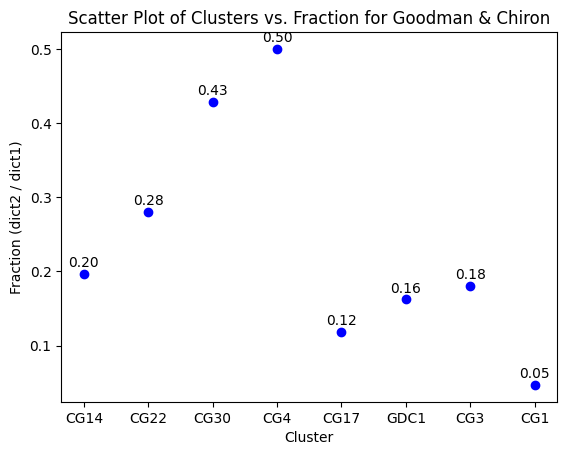

In [165]:
combined_counter = Counter(dict1) + Counter(dict3)
total_star = dict(combined_counter)
combined_counter = Counter(dict2) + Counter(dict4)
acretor = dict(combined_counter)
print(dict1,dict3,total_star)
print(acretor)

# Calculate fractions
fractions = {key: acretor[key] / total_star[key] for key in acretor.keys()}

# Prepare data for plotting
clusters = list(fractions.keys())
fraction_values = list(fractions.values())

# Create the scatter plot
plt.scatter(clusters, fraction_values, color='blue')

# Annotate each point with the fraction value
for cluster, fraction in fractions.items():
    plt.annotate(f'{fraction:.2f}', (cluster, fraction), textcoords="offset points", xytext=(0,5), ha='center')

# Add labels and title
plt.xlabel('Cluster')
plt.ylabel('Fraction (dict2 / dict1)')
plt.title('Scatter Plot of Clusters vs. Fraction for Goodman & Chiron')

# Display the plot
plt.show()

{'CG14': 15, 'CG22': 14, 'CG30': 14, 'CG3': 1, 'CG4': 7} {'CG3': 60, 'CG14': 46, 'CG17': 59, 'CG1': 64, 'CG4': 7, 'GDC1': 37, 'CG22': 11} {'CG3': 1, 'CG4': 2, 'CG14': 1, 'CG22': 2, 'CG1': 0, 'CG17': 0, 'GDC1': 0, 'CG30': 4} {'CG14': 62, 'CG22': 27, 'CG30': 18, 'CG3': 62, 'CG4': 16, 'CG17': 59, 'CG1': 64, 'GDC1': 37}


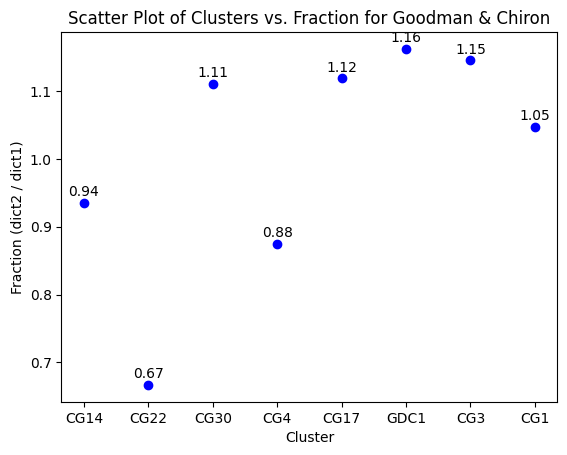

In [164]:
dict_previous1={
    'CG3':1,
'CG4':2,
'CG14':1,
'CG22':2,
'CG1':0,
'CG17':0,
'GDC1':0,
'CG30':4

}
dict_previous2={
'CG3':60,
'CG4':7,
'CG14':46,
'CG22':11,
'CG1':64,
'CG17':59,
'GDC1':37,
'CG30':14,
}
combined_counter = Counter(dict1) + Counter(dict3)+Counter(dict_previous1)
total_star = dict(combined_counter)
combined_counter = Counter(dict2) + Counter(dict4)+Counter(dict_previous2)
acretor = dict(combined_counter)
print(dict1,dict3,dict_previous1,total_star)

# Calculate fractions
fractions = {key: acretor[key] / total_star[key] for key in acretor.keys()}

# Prepare data for plotting
clusters = list(fractions.keys())
fraction_values = list(fractions.values())

# Create the scatter plot
plt.scatter(clusters, fraction_values, color='blue')

# Annotate each point with the fraction value
for cluster, fraction in fractions.items():
    plt.annotate(f'{fraction:.2f}', (cluster, fraction), textcoords="offset points", xytext=(0,5), ha='center')

# Add labels and title
plt.xlabel('Cluster')
plt.ylabel('Fraction (dict2 / dict1)')
plt.title('Scatter Plot of Clusters vs. Fraction for Goodman & Chiron')

# Display the plot
plt.show()

In [ ]:
star,spt=read_excel((file_path, sheet_name, "D", ['cluster']))

DataFrame columns: Index(['#name', 'rv', 'Goodman'], dtype='object', name=0)
DataFrame columns: Index(['rverr'], dtype='object', name=0)
DataFrame columns: Index(['Goodman_error'], dtype='object', name=0)


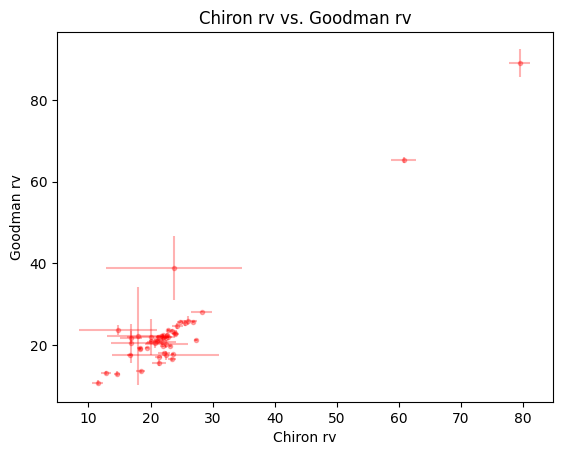

In [136]:
file_path=r'C:\Users\ZY\Desktop\RV_comparasion.xlsx'

#read the excel to get the name and spectral type
sheet_name='Sheet1'
x,y,z=read_excel(file_path, sheet_name, 'F,G,K', ['#name','rv','Goodman'])
y = np.array(y, dtype=float)
z = np.array(z, dtype=float)
yerr = read_excel(file_path, sheet_name, "H", ['rverr'])
zerr =read_excel(file_path, sheet_name, "L", ['Goodman_error'])

plt.errorbar(y,z,xerr=zerr,yerr=yerr,fmt='.', color='red', label='rv comparasion',alpha=0.3)
#plt.scatter(y,z,alpha=0.3)

plt.xlabel('Chiron rv')
plt.ylabel('Goodman rv')
plt.title('Chiron rv vs. Goodman rv')

# #annotation
# for i in range(len(x)):
#     plt.annotate(x[i], (y[i], z[i]), textcoords="offset points", xytext=(0,10), ha='center')
fit = np.polyfit(y, z, 2)
p = np.poly1d(fit)
#plt.plot(y,p(y),'--',label="best fit line",color='grey')



DataFrame columns: Index(['#CG', 'accfrac', 'age'], dtype='object', name=0)
DataFrame columns: Index(['ageerr(+)', 'ageerr(-)'], dtype='object', name=0)
DataFrame columns: Index(['accfrac_err'], dtype='object', name=0)
DataFrame columns: Index(['accfrac', 'age'], dtype='object', name=0)
DataFrame columns: Index(['accfrac_err'], dtype='object', name=0)


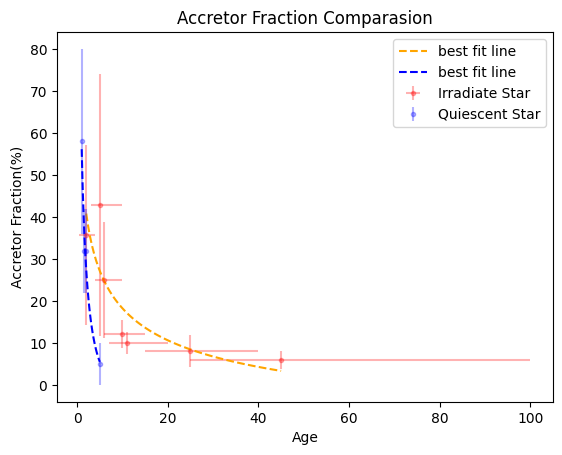

In [200]:
file_path=r'C:\Users\ZY\Desktop\RV_comparasion.xlsx'

#read the excel to get the name and spectral type
sheet_name='Accretor'
x,y,z=read_excel(file_path, sheet_name, 'U,Z,X', ['#CG','age','accfrac'])
y = np.array(y, dtype=float)
z = np.array(z, dtype=float)
yerr1,yerr2 = read_excel(file_path, sheet_name, "AA,AB", ['ageerr(+)','ageerr(-)'])
zerr =read_excel(file_path, sheet_name, "Y", ['accfrac_err'])

plt.errorbar(y,z,yerr=zerr,xerr=[yerr2,yerr1],fmt='.', color='red', label='Irradiate Star',alpha=0.3)
#plt.scatter(y,z,alpha=0.3)

# #annotation
# for i in range(len(x)):
#     plt.annotate(x[i], (y[i], z[i]), textcoords="offset points", xytext=(0,10), ha='center')
fit = np.polyfit(np.log(y), z, 2)
p = np.poly1d(fit)
y_fit = np.linspace(min(y), max(y), 100)
plt.plot(y_fit,p(np.log(y_fit)),'--',label="best fit line",color='orange')
plt.legend()


plt.xlabel('Age')
plt.ylabel('Accretor Fraction(%)')
plt.title('Accretor Fraction Comparasion')



Q_y,Q_z=read_excel(file_path, sheet_name, 'E,B', ['age','accfrac'])
Q_y = np.array(Q_y, dtype=float)
Q_z = np.array(Q_z, dtype=float)
#Q_yerr= read_excel(file_path, sheet_name, "AA,AB", ['ageerr(+)','ageerr(-)'])
Q_zerr =read_excel(file_path, sheet_name, "C", ['accfrac_err'])
Q_zerr = np.array(Q_zerr, dtype=float)
plt.errorbar(Q_y,Q_z,yerr=Q_zerr,fmt='.', color='blue', label='Quiescent Star',alpha=0.3)

Q_fit = np.polyfit(np.log(Q_y), Q_z, 2)
Q_p = np.poly1d(Q_fit)
Q_y_fit = np.linspace(min(Q_y), max(Q_y), 100)
plt.plot(Q_y_fit,Q_p(np.log(Q_y_fit)),'--',label="best fit line",color='blue')
plt.legend()

DataFrame columns: Index(['#CG', 'accfrac', 'age'], dtype='object', name=0)
DataFrame columns: Index(['ageerr(+)', 'ageerr(-)'], dtype='object', name=0)
DataFrame columns: Index(['accfrac_err'], dtype='object', name=0)
DataFrame columns: Index(['accfrac', 'age'], dtype='object', name=0)
DataFrame columns: Index(['accfrac_err'], dtype='object', name=0)


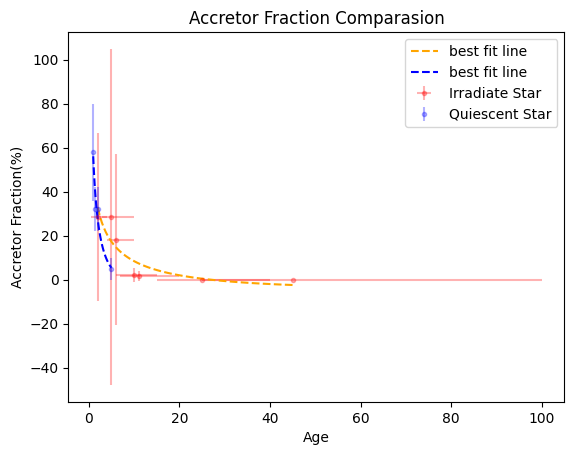

In [205]:
file_path=r'C:\Users\ZY\Desktop\RV_comparasion.xlsx'

#read the excel to get the name and spectral type
sheet_name='Accretor'
x,y,z=read_excel(file_path, sheet_name, 'G,L,J', ['#CG','age','accfrac'])
y = np.array(y, dtype=float)
z = np.array(z, dtype=float)
yerr1,yerr2 = read_excel(file_path, sheet_name, "M,N", ['ageerr(+)','ageerr(-)'])
zerr =read_excel(file_path, sheet_name, "K", ['accfrac_err'])

plt.errorbar(y,z,yerr=zerr,xerr=[yerr2,yerr1],fmt='.', color='red', label='Irradiate Star',alpha=0.3)
#plt.scatter(y,z,alpha=0.3)

# #annotation
# for i in range(len(x)):
#     plt.annotate(x[i], (y[i], z[i]), textcoords="offset points", xytext=(0,10), ha='center')
fit = np.polyfit(np.log(y), z, 2)
p = np.poly1d(fit)
y_fit = np.linspace(min(y), max(y), 100)
plt.plot(y_fit,p(np.log(y_fit)),'--',label="best fit line",color='orange')
plt.legend()


plt.xlabel('Age')
plt.ylabel('Accretor Fraction(%)')
plt.title('Accretor Fraction Comparasion')



Q_y,Q_z=read_excel(file_path, sheet_name, 'E,B', ['age','accfrac'])
Q_y = np.array(Q_y, dtype=float)
Q_z = np.array(Q_z, dtype=float)
#Q_yerr= read_excel(file_path, sheet_name, "AA,AB", ['ageerr(+)','ageerr(-)'])
Q_zerr =read_excel(file_path, sheet_name, "C", ['accfrac_err'])
Q_zerr = np.array(Q_zerr, dtype=float)
plt.errorbar(Q_y,Q_z,yerr=Q_zerr,fmt='.', color='blue', label='Quiescent Star',alpha=0.3)

Q_fit = np.polyfit(np.log(Q_y), Q_z, 2)
Q_p = np.poly1d(Q_fit)
Q_y_fit = np.linspace(min(Q_y), max(Q_y), 100)
plt.plot(Q_y_fit,Q_p(np.log(Q_y_fit)),'--',label="best fit line",color='blue')
plt.legend()